<a href="https://colab.research.google.com/github/ted-marlon/Data-Science/blob/main/Bankloan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
data=pd.read_csv('Bank_Personal_Loan_Modelling(1).csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [5]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Nous voyons que nous n'observons aucune valeur manquante dans notre jeu de donn√©es..

In [6]:
data.head()

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [7]:
data.isnull().nunique

<bound method DataFrame.nunique of          ID    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0     False  False       False   False     False   False  False      False   
1     False  False       False   False     False   False  False      False   
2     False  False       False   False     False   False  False      False   
3     False  False       False   False     False   False  False      False   
4     False  False       False   False     False   False  False      False   
...     ...    ...         ...     ...       ...     ...    ...        ...   
4995  False  False       False   False     False   False  False      False   
4996  False  False       False   False     False   False  False      False   
4997  False  False       False   False     False   False  False      False   
4998  False  False       False   False     False   False  False      False   
4999  False  False       False   False     False   False  False      False   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0        False          False               False       False   False   
1        False          False               False       False   False   
2        False          False               False       False   False   
3        False          False               False       False   False   
4        False          False               False       False   False   
...        ...            ...                 ...         ...     ...   
4995     False          False               False       False   False   
4996     False          False               False       False   False   
4997     False          False               False       False   False   
4998     False          False               False       False   False   
4999     False          False               False       False   False   

      CreditCard  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
4995       False  
4996       False  
4997       False  
4998       False  
4999       False  

[5000 rows x 14 columns]>

In [8]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Renommons nos features en fran√ßais pour une meilleure compr√©hension..

In [9]:
data = data.rename(columns={
    'ID': 'ID',
    'Age': '√Çge',
    'Experience': 'Exp√©rience',
    'Income': 'Revenu',
    'ZIP Code': 'Code Postal',
    'Family': 'Famille',
    'CCAvg': 'Moyenne Carte Cr√©dit',
    'Education': '√âducation',
    'Mortgage': 'Pr√™t Immobilier',
    'Personal Loan': 'Pr√™t Personnel',
    'Securities Account': 'Compte Titres',
    'CD Account': 'Compte √† Terme',
    'Online': 'En Ligne',
    'CreditCard': 'Carte de Cr√©dit'
})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    5000 non-null   int64 
 1   √Çge                   5000 non-null   int64 
 2   Exp√©rience            5000 non-null   int64 
 3   Revenu                5000 non-null   int64 
 4   Code Postal           5000 non-null   int64 
 5   Famille               5000 non-null   int64 
 6   Moyenne Carte Cr√©dit  5000 non-null   object
 7   √âducation             5000 non-null   int64 
 8   Pr√™t Immobilier       5000 non-null   int64 
 9   Pr√™t Personnel        5000 non-null   int64 
 10  Compte Titres         5000 non-null   int64 
 11  Compte √† Terme        5000 non-null   int64 
 12  En Ligne              5000 non-null   int64 
 13  Carte de Cr√©dit       5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [11]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r',
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu',
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary',
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare',
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot',
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20',
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight',
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# Analyse Univari√©

Analyse de la variable cible "Pr√™t personnel"

Pr√™t Personnel
0    4520
1     480
Name: count, dtype: int64


/tmp/ipython-input-296287432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pr√™t Personnel',data=data,palette = colors[value])


<Axes: xlabel='Pr√™t Personnel', ylabel='count'>

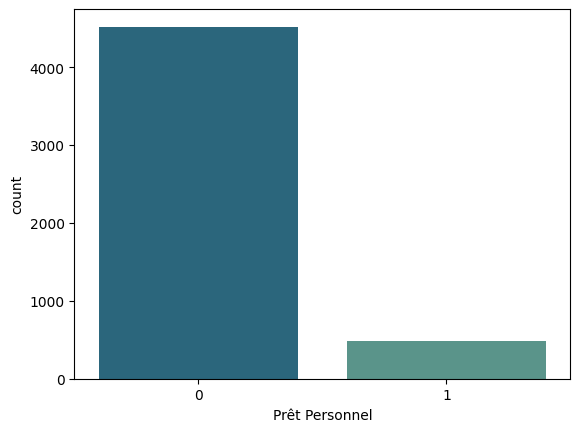

In [12]:
value = randint(0, len(colors)-1)
print(data['Pr√™t Personnel'].value_counts())
sns.countplot(x='Pr√™t Personnel',data=data,palette = colors[value])

Nous remarquons un d√©s√©quilibre flagrant au niveau de la variable cible "Pr√™t personnel". Nous devons veiller √† ce que cela n'impacte pas le mod√®le de pr√©diction...

In [13]:
data.head()

ID  √Çge  Exp√©rience  Revenu  Code Postal  Famille Moyenne Carte Cr√©dit  \
0   1   25           1      49        91107        4                 1/60   
1   2   45          19      34        90089        3                 1/50   
2   3   39          15      11        94720        1                 1/00   
3   4   35           9     100        94112        1                 2/70   
4   5   35           8      45        91330        4                 1/00   

   √âducation  Pr√™t Immobilier  Pr√™t Personnel  Compte Titres  Compte √† Terme  \
0          1                0               0              1               0   
1          1                0               0              1               0   
2          1                0               0              0               0   
3          2                0               0              0               0   
4          2                0               0              0               0   

   En Ligne  Carte de Cr√©dit  
0         0                0  
1         0                0  
2         0                0  
3         0                0  
4         0                1

S√©parons maintenant les variables de notre base de donn√©es..

In [14]:
cat_vars=["Famille","√âducation","Compte Titres","Compte √† Terme","En Ligne","Carte de Cr√©dit"]
num_vars=["√Çge","Exp√©rience","Revenu","Pr√™t Immobilier"]

Analyse des variables cat√©gorielles.

Famille
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


/tmp/ipython-input-3878541403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Famille',data=data,palette = colors[value])


<Axes: xlabel='Famille', ylabel='count'>

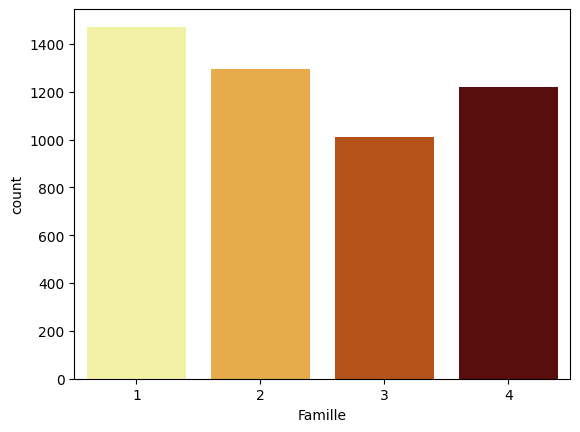

In [15]:
value = randint(0, len(colors)-1)
print(data['Famille'].value_counts())
sns.countplot(x='Famille',data=data,palette = colors[value])

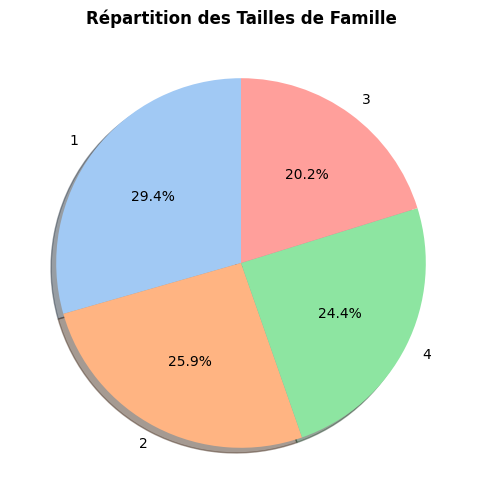

In [16]:
# Compter les valeurs de 'Famille'
famille_counts = data['Famille'].value_counts()
# Cr√©er un pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    famille_counts,
    labels=famille_counts.index,
    autopct='%1.1f%%',  # Affiche les pourcentages
    startangle=90,       # Angle de d√©part
    colors=sns.color_palette('pastel'),  # Palette de couleurs douces
    shadow=True         # Ombre l√©g√®re pour un effet 3D
)
plt.title('R√©partition des Tailles de Famille', fontweight='bold')
plt.show()

Nous voyons √† travers ces graphes que la majorit√© des clients de notre banque sont c√©libataires...üòÇ

√âducation
1    2096
3    1501
2    1403
Name: count, dtype: int64


/tmp/ipython-input-1197898771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='√âducation',data=data,palette = colors[value])


<Axes: xlabel='√âducation', ylabel='count'>

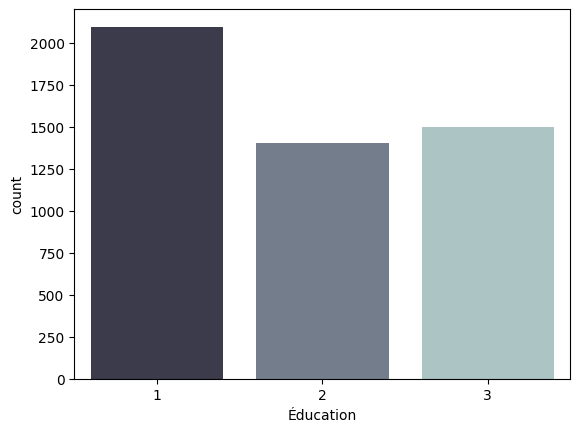

In [17]:
value = randint(0, len(colors)-1)
print(data['√âducation'].value_counts())
sns.countplot(x='√âducation',data=data,palette = colors[value])

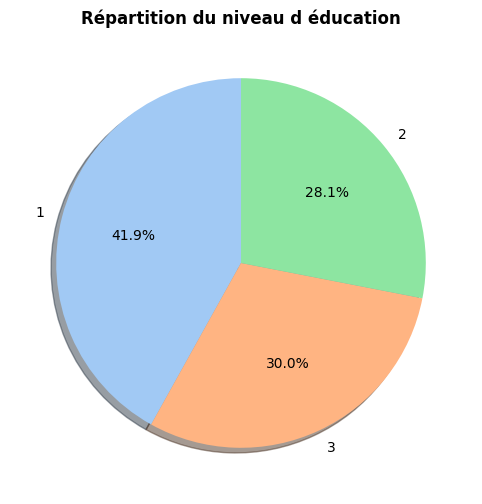

In [18]:
# Compter les valeurs de 'Famille'
education_counts = data['√âducation'].value_counts()
# Cr√©er un pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    education_counts,
    labels=education_counts.index,
    autopct='%1.1f%%',  # Affiche les pourcentages
    startangle=90,       # Angle de d√©part
    colors=sns.color_palette('pastel'),  # Palette de couleurs douces
    shadow=True         # Ombre l√©g√®re pour un effet 3D
)
plt.title('R√©partition du niveau d √©ducation', fontweight='bold')
plt.show()

Compte Titres
0    4478
1     522
Name: count, dtype: int64


/tmp/ipython-input-2202178922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Compte Titres',data=data,palette = colors[value])


<Axes: xlabel='Compte Titres', ylabel='count'>

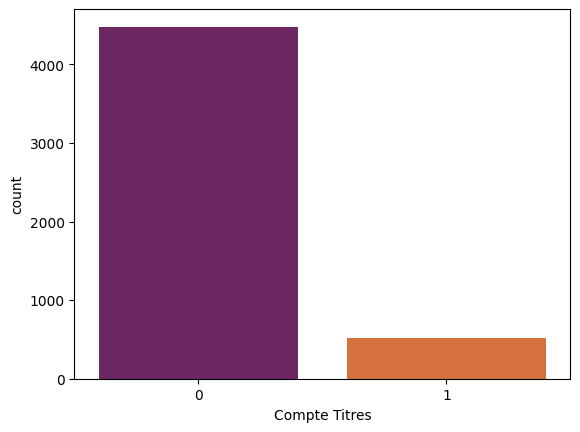

In [19]:
value = randint(0, len(colors)-1)
print(data['Compte Titres'].value_counts())
sns.countplot(x='Compte Titres',data=data,palette = colors[value])

Compte √† Terme
0    4698
1     302
Name: count, dtype: int64


/tmp/ipython-input-224760012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Compte √† Terme',data=data,palette = colors[value])


<Axes: xlabel='Compte √† Terme', ylabel='count'>

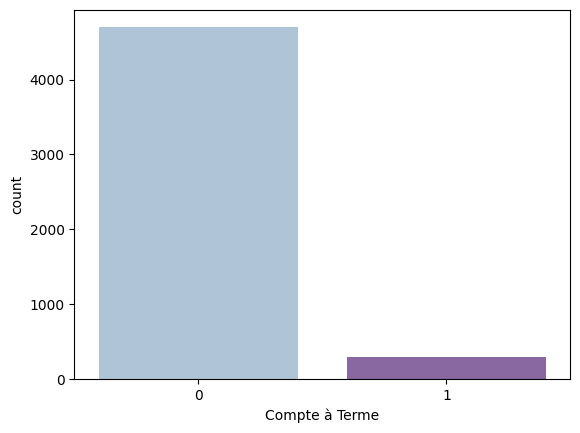

In [20]:
value = randint(0, len(colors)-1)
print(data['Compte √† Terme'].value_counts())
sns.countplot(x='Compte √† Terme',data=data,palette = colors[value])

En Ligne
1    2984
0    2016
Name: count, dtype: int64


/tmp/ipython-input-2043692200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='En Ligne',data=data,palette = colors[value])


<Axes: xlabel='En Ligne', ylabel='count'>

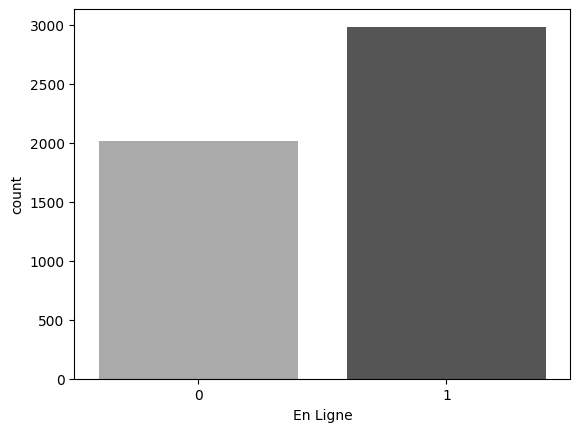

In [21]:
value = randint(0, len(colors)-1)
print(data['En Ligne'].value_counts())
sns.countplot(x='En Ligne',data=data,palette = colors[value])

Carte de Cr√©dit
0    3530
1    1470
Name: count, dtype: int64


/tmp/ipython-input-2185313153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Carte de Cr√©dit',data=data,palette = colors[value])


<Axes: xlabel='Carte de Cr√©dit', ylabel='count'>

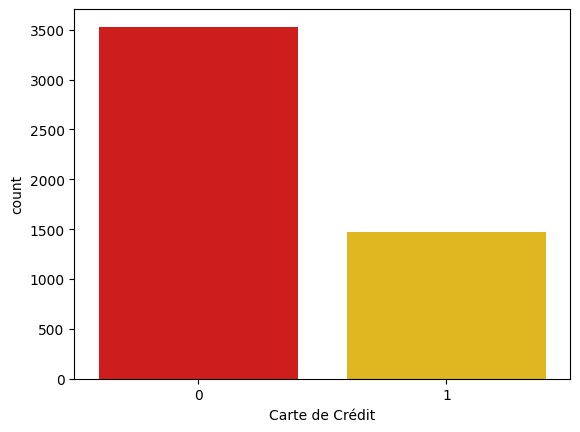

In [22]:
value = randint(0, len(colors)-1)
print(data['Carte de Cr√©dit'].value_counts())
sns.countplot(x='Carte de Cr√©dit',data=data,palette = colors[value])

Analyse des variables num√©riques

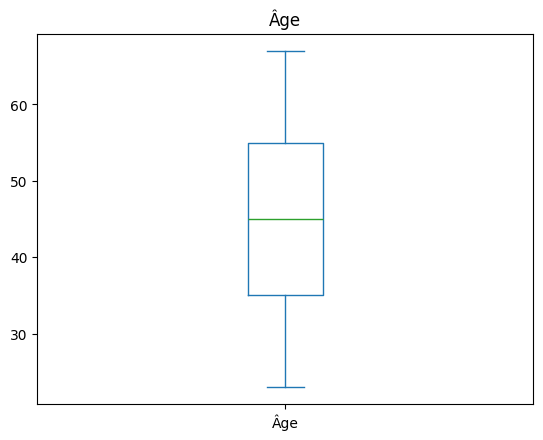

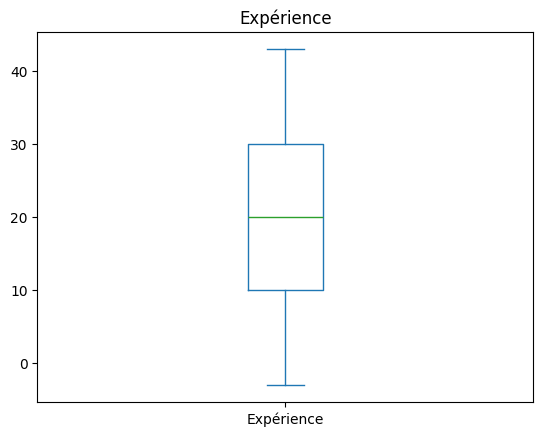

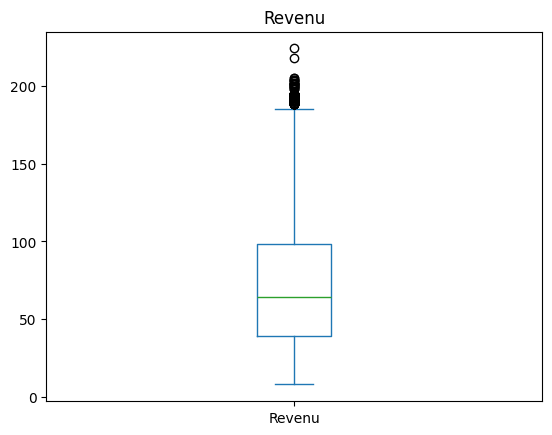

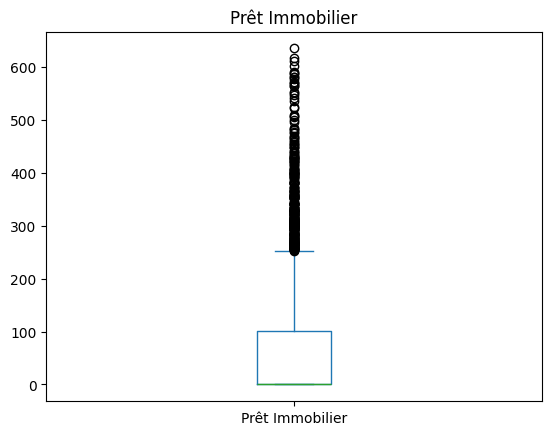

In [23]:
#Passons √† l'analyse des variables num√©riques, nous allons utiliser les boxplots...
for var in num_vars:
     data[var].plot(kind='box')
     plt.title(var)
     plt.show()

In [24]:
data.describe()

ID          √Çge   Exp√©rience       Revenu   Code Postal  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

           Famille    √âducation  Pr√™t Immobilier  Pr√™t Personnel  \
count  5000.000000  5000.000000      5000.000000     5000.000000   
mean      2.396400     1.881000        56.498800        0.096000   
std       1.147663     0.839869       101.713802        0.294621   
min       1.000000     1.000000         0.000000        0.000000   
25%       1.000000     1.000000         0.000000        0.000000   
50%       2.000000     2.000000         0.000000        0.000000   
75%       3.000000     3.000000       101.000000        0.000000   
max       4.000000     3.000000       635.000000        1.000000   

       Compte Titres  Compte √† Terme     En Ligne  Carte de Cr√©dit  
count    5000.000000      5000.00000  5000.000000      5000.000000  
mean        0.104400         0.06040     0.596800         0.294000  
std         0.305809         0.23825     0.490589         0.455637  
min         0.000000         0.00000     0.000000         0.000000  
25%         0.000000         0.00000     0.000000         0.000000  
50%         0.000000         0.00000     1.000000         0.000000  
75%         0.000000         0.00000     1.000000         1.000000  
max         1.000000         1.00000     1.000000         1.000000

# Analyse Bi-vari√©e

Famille  Pr√™t Personnel
1        0                 1365
2        0                 1190
4        0                 1088
3        0                  877
4        1                  134
3        1                  133
1        1                  107
2        1                  106
Name: count, dtype: int64


<Axes: xlabel='Famille', ylabel='count'>

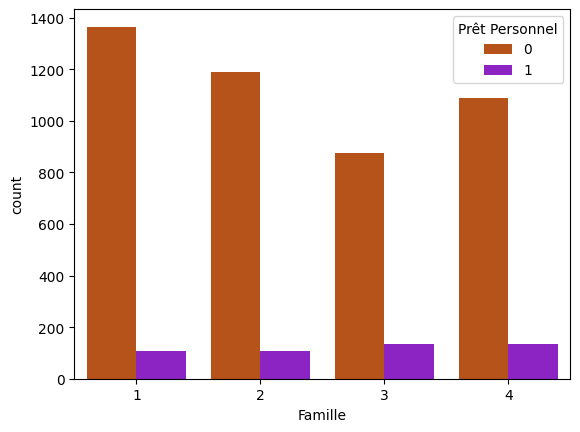

In [25]:
#Commen√ßons d'abord √† √©tudier la relation entre le churn et les variables cat√©gorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
print(data[['Famille','Pr√™t Personnel']].value_counts())
sns.countplot(x='Famille',hue='Pr√™t Personnel',data = data,palette = colors[value])

<Axes: xlabel='√âducation', ylabel='count'>

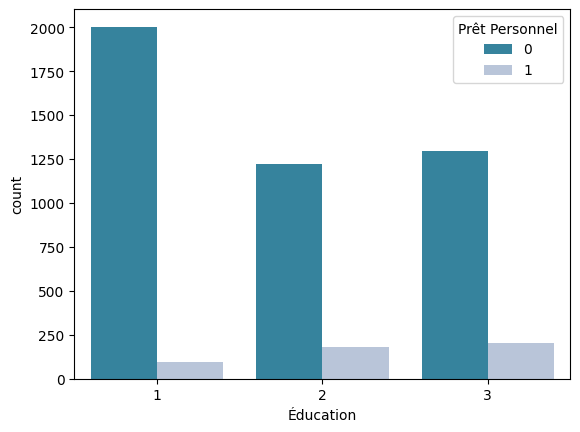

In [26]:
#Commen√ßons d'abord √† √©tudier la relation entre le churn et les variables cat√©gorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='√âducation',hue='Pr√™t Personnel',data = data,palette = colors[value])

<Axes: xlabel='Compte Titres', ylabel='count'>

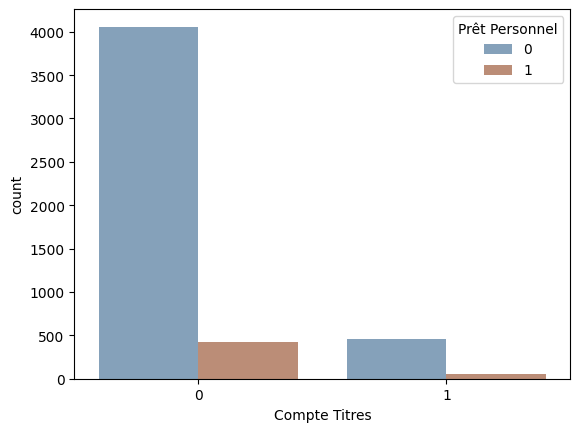

In [27]:
#Commen√ßons d'abord √† √©tudier la relation entre le churn et les variables cat√©gorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='Compte Titres',hue='Pr√™t Personnel',data = data,palette = colors[value])

<Axes: xlabel='Compte √† Terme', ylabel='count'>

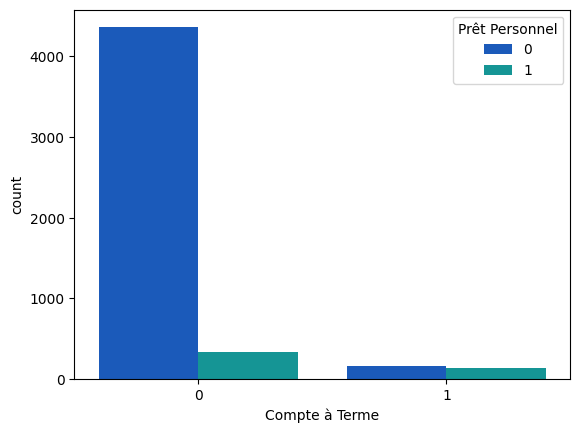

In [28]:
#Commen√ßons d'abord √† √©tudier la relation entre le churn et les variables cat√©gorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='Compte √† Terme',hue='Pr√™t Personnel',data = data,palette = colors[value])

<Axes: xlabel='En Ligne', ylabel='count'>

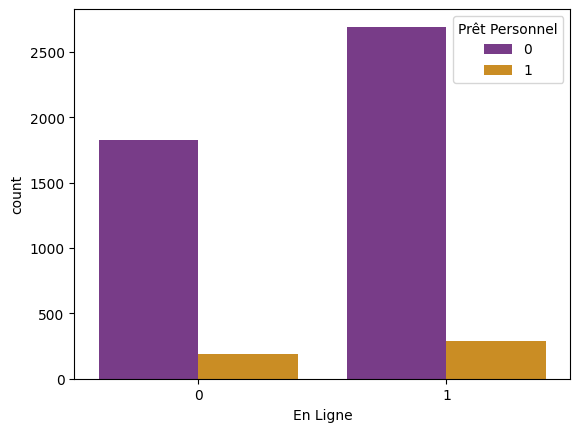

In [29]:
#Commen√ßons d'abord √† √©tudier la relation entre le churn et les variables cat√©gorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='En Ligne',hue='Pr√™t Personnel',data = data,palette = colors[value])

In [30]:
cat_vars

['Famille',
 '√âducation',
 'Compte Titres',
 'Compte √† Terme',
 'En Ligne',
 'Carte de Cr√©dit']

<Axes: xlabel='Carte de Cr√©dit', ylabel='count'>

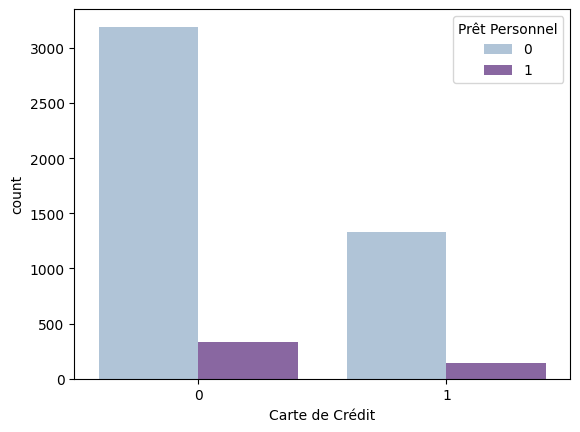

In [31]:
#Commen√ßons d'abord √† √©tudier la relation entre le churn et les variables cat√©gorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='Carte de Cr√©dit',hue='Pr√™t Personnel',data = data,palette = colors[value])

In [32]:
from scipy.stats import chi2_contingency
#Initialize lists to store results
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

for var in cat_vars:
  contingency_table = pd.crosstab(data['Pr√™t Personnel'], data[var])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  n = contingency_table.sum().sum()  # total number of observations
  phi2 = chi2 / n  # phi-squared
  r, k = contingency_table.shape  # number of rows and columns
  # Bias correction (used when the table is not square or sample is small)
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rc = r - ((r-1)**2)/(n-1)
  kc = k - ((k-1)**2)/(n-1)
  cramer_v = np.sqrt(phi2corr / min(rc - 1, kc - 1))
  var_names.append(var)
  chi2_stats.append(chi2)
  p_values.append(p)
  cramer_vs.append(cramer_v)

results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})
results_df.sort_values(by='V de Cramer', inplace=True, ascending=False)
print(results_df)

          Variable        Chi2       P-valeur  V de Cramer
3   Compte √† Terme  495.904242  7.398298e-110     0.314644
1        √âducation  111.239872   6.991474e-25     0.147825
0          Famille   29.676116   1.614412e-06     0.073049
2    Compte Titres    2.172311   1.405150e-01     0.015312
4         En Ligne    0.156007   6.928600e-01     0.000000
5  Carte de Cr√©dit    0.021144   8.843861e-01     0.000000


D'apr√®s le Test du khi2, nous voyons que les variables cat√©gorielles ayant une forte relation avec la variable cible sont **Compte √† Terme, Education et Famille**

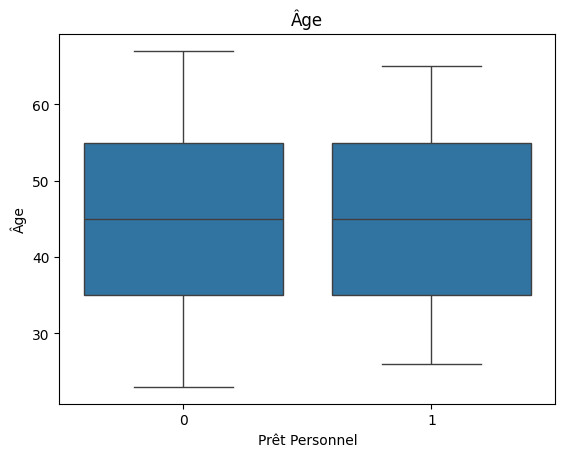

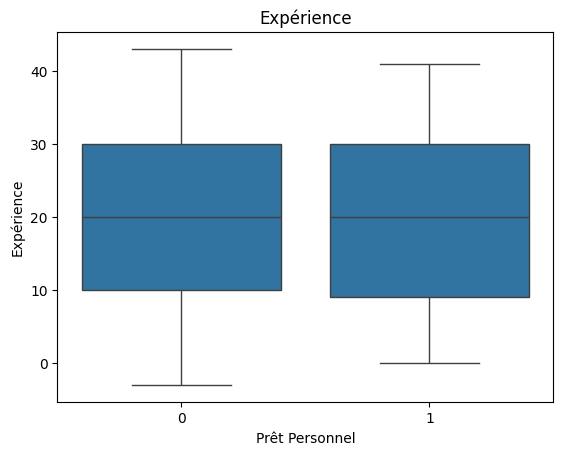

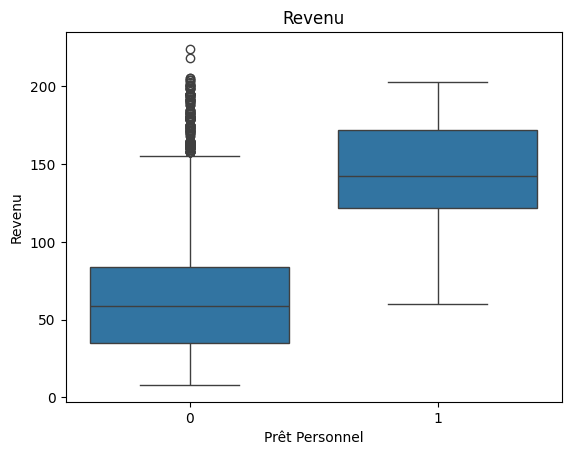

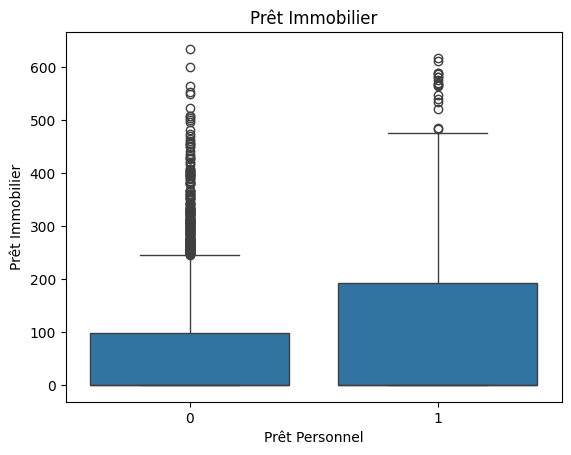

In [33]:
for var in num_vars:
    sns.boxplot(x='Pr√™t Personnel', y=var, data=data)
    plt.title(var)
    plt.xlabel('Pr√™t Personnel')
    plt.ylabel(var)
    plt.show()

In [34]:
import pandas as pd
import scipy.stats as stats

# Initialiser les listes pour stocker les r√©sultats
var_names = []
kw_stats = []
p_values = []
significatifs = []

# Parcourir toutes les variables num√©riques
for var in num_vars:
    # Cr√©er deux groupes selon la variable cible (ici : binaire 0/1)
    group0 = data[data['Pr√™t Personnel'] == 0][var]
    group1 = data[data['Pr√™t Personnel'] == 1][var]

    # Appliquer le test de Kruskal-Wallis
    kw_stat, p_val = stats.kruskal(group0, group1)

    # D√©terminer si la diff√©rence est significative
    est_significatif = "OUI" if p_val < 0.05 else "NON"

    # Stocker les r√©sultats
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p_val)
    significatifs.append(est_significatif)

# Cr√©er un DataFrame avec les r√©sultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values,
    'Significatif': significatifs
})

# Trier les r√©sultats par P-valeur croissante
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher les r√©sultats
print(results_df)

          Variable  Kruskal-Wallis       P-valeur Significatif
2           Revenu      927.495199  1.034651e-203          OUI
3  Pr√™t Immobilier       20.026568   7.637366e-06          OUI
0              √Çge        0.332168   5.643852e-01          NON
1       Exp√©rience        0.312397   5.762132e-01          NON


D'apr√®s le test de Kruskal-Wallys,
Nous avons deux variables num√©riques significatifs √† notre variable cible √† savoir le Revenu et le Pr√™t Immobilier

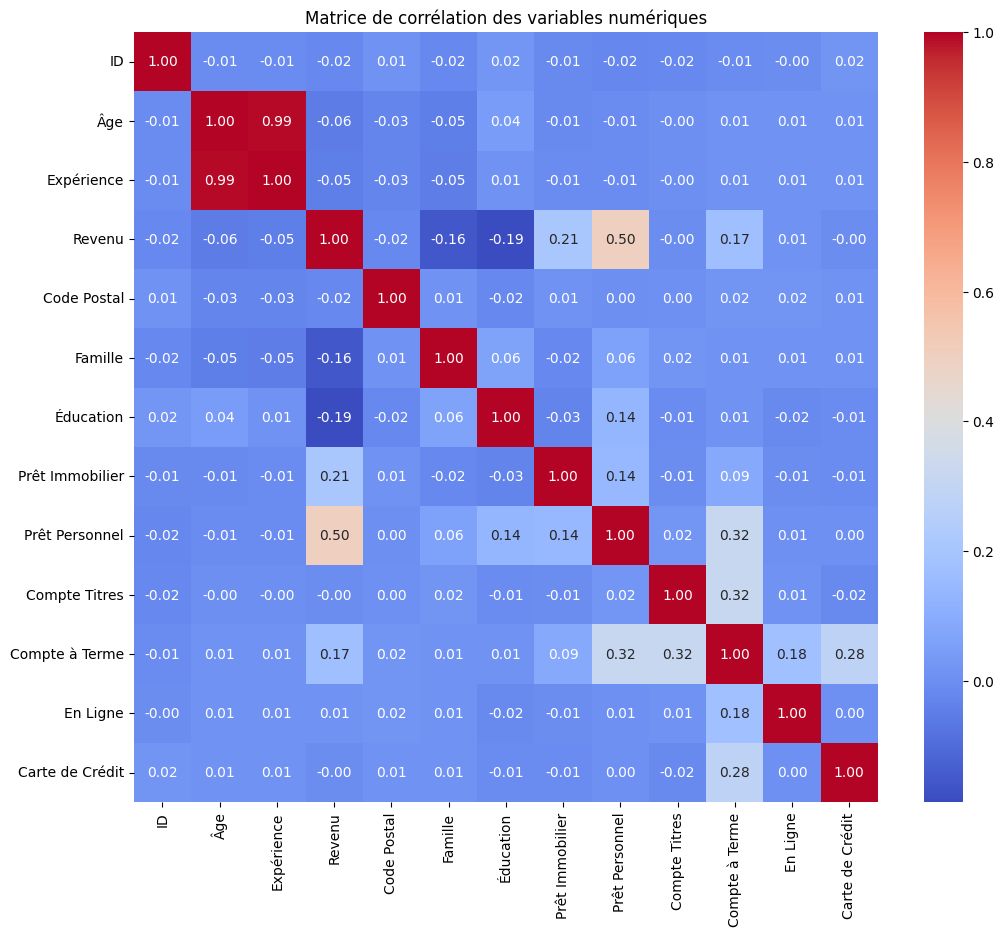

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrer les colonnes num√©riques (en excluant les cat√©gorielles)
num_data = data.select_dtypes(include=['int64', 'float64'])

# 2. Calculer la matrice de corr√©lation
corr = num_data.corr()

# 3. Afficher la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # fmt pour contr√¥ler les d√©cimales
plt.title("Matrice de corr√©lation des variables num√©riques")
plt.show()

# Entrainement du mod√®le

R√©gression Logistique

Accuracy: 0.951

Matrice de confusion:
 [[883  12]
 [ 37  68]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.85      0.65      0.74       105

    accuracy                           0.95      1000
   macro avg       0.90      0.82      0.85      1000
weighted avg       0.95      0.95      0.95      1000



<Axes: >

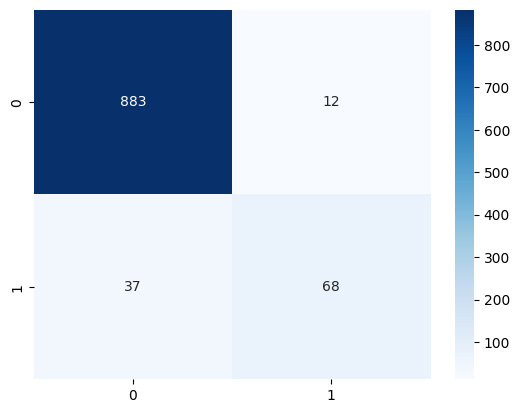

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
 # Si normalisation n√©cessaire

X = data.drop(columns=['ID', 'Pr√™t Personnel','Code Postal','Moyenne Carte Cr√©dit'])  # Exclure la cible et les colonnes non pertinentes
y = data['Pr√™t Personnel']  # Variable cible

# drop_first=True pour √©viter la colin√©arit√©
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# test_size=0.2 : 20% des donn√©es en test
model = LogisticRegression(max_iter=1000)  # max_iter pour √©viter les warnings
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# M√©triques principales
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Apr√®s entrainement, nous voyons que le mod√®le poss√®de d'excellent r√©sultats avec un accuracy de 0,951 et un f1-score assez bon pour les deux modalit√©s de notre variable cible..
Essayons d'utiliser une m√©thode de sur-√©chantillonage pour √©quilibrer les classes...

Accuracy: 0.892

Matrice de confusion:
 [[796  99]
 [  9  96]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       895
           1       0.49      0.91      0.64       105

    accuracy                           0.89      1000
   macro avg       0.74      0.90      0.79      1000
weighted avg       0.94      0.89      0.91      1000



<Axes: >

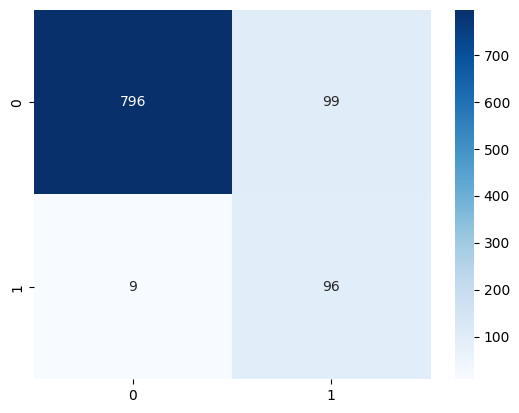

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model2 = LogisticRegression(max_iter=1000,random_state=42) # Increased iterations
model2.fit(X_train_resampled, y_train_resampled)

y_pred_2 = model2.predict(X_test)

# M√©triques principales
print("Accuracy:", accuracy_score(y_test, y_pred_2))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred_2))
print("\nRapport de classification:\n", classification_report(y_test, y_pred_2))

cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')

La matrice de confusion nous montre que le taux d'erreur au niveau des clients recevant un avis favorable pour leur pr√™t..
Ce qui est une tr√®s bonne chose, toutefois nous voyons la marge d'erreur prendre une autre tournure au niveau de la classe oppos√©e...
Essayons alors d'autres types de mod√®les ..

Arbre de d√©cision DecisionTreeClassifier

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       895
           1       0.78      0.92      0.85       105

    accuracy                           0.96      1000
   macro avg       0.89      0.95      0.91      1000
weighted avg       0.97      0.96      0.97      1000



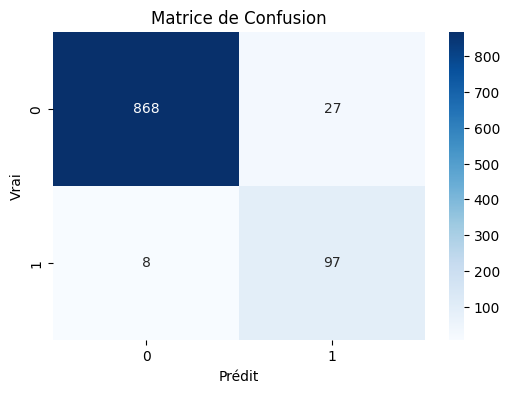

In [38]:
# Initialiser l'arbre de d√©cision
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,          # √âvite le sur-apprentissage
    min_samples_split=10  # Nombre min d'√©chantillons pour split
)

# Entra√Ænement
dt_model.fit(X_train_resampled, y_train_resampled)

# Pr√©dictions
y_pred = dt_model.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Rapport d√©taill√©
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Vrai')
plt.xlabel('Pr√©dit')
plt.show()

Nous voyons bien que la marge d'erreur pour la classe 0 a largement diminu√©. Par cons√©quent le mod√®le d'arbre de d√©cision offre de meillleurs r√©sultats que le mod√®le de Regression Logistique.

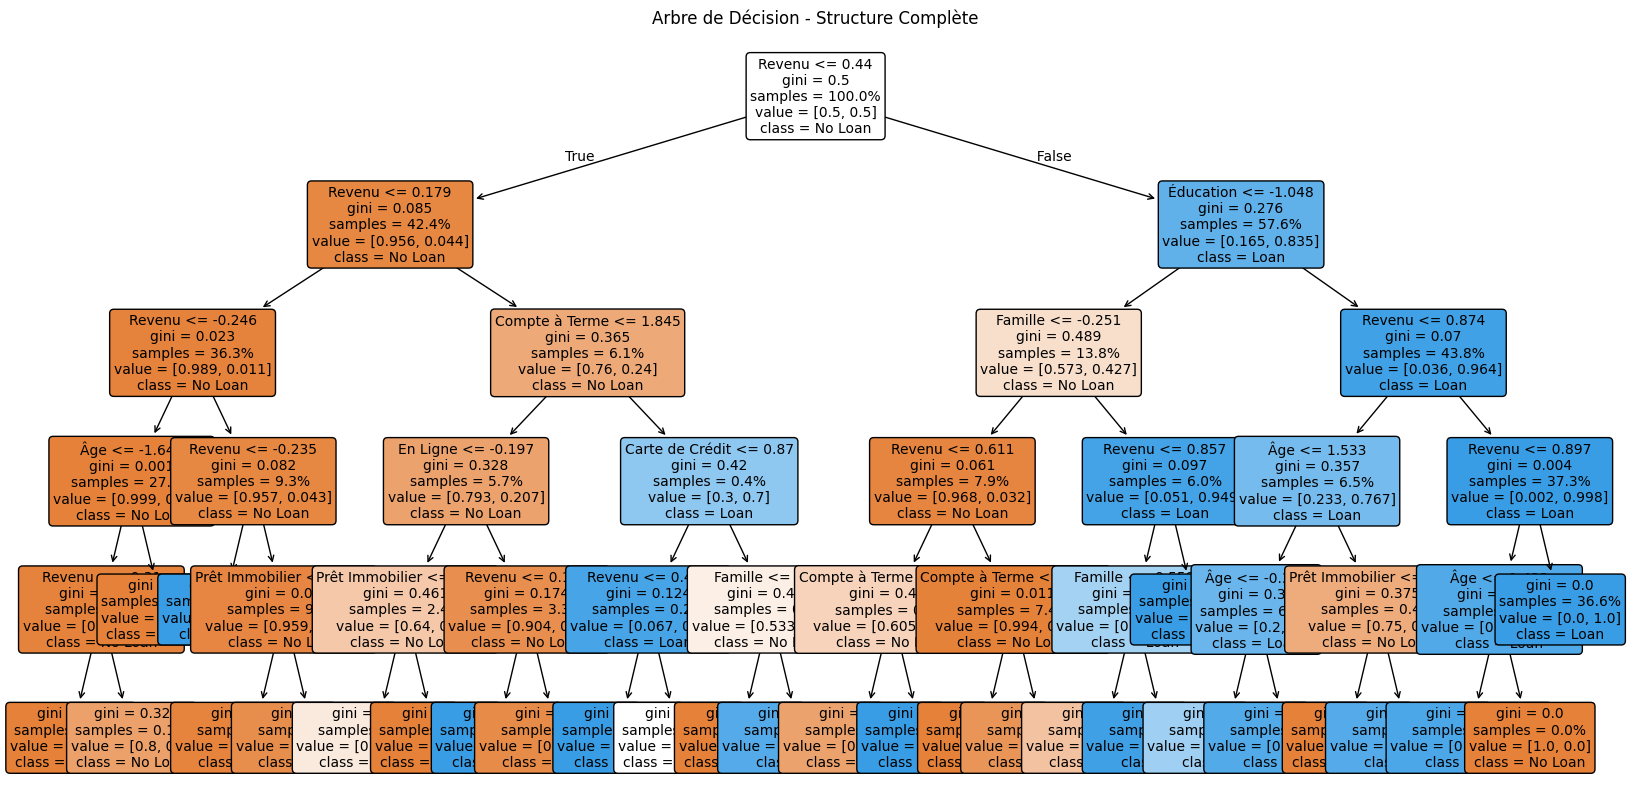

In [39]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Loan', 'Loan'],  # Adaptez selon vos classes
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10
)
plt.title("Arbre de D√©cision - Structure Compl√®te")
plt.show()

Support Vector Classifier

Accuracy: 0.8890

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       895
           1       0.48      0.91      0.63       105

    accuracy                           0.89      1000
   macro avg       0.74      0.90      0.78      1000
weighted avg       0.94      0.89      0.90      1000



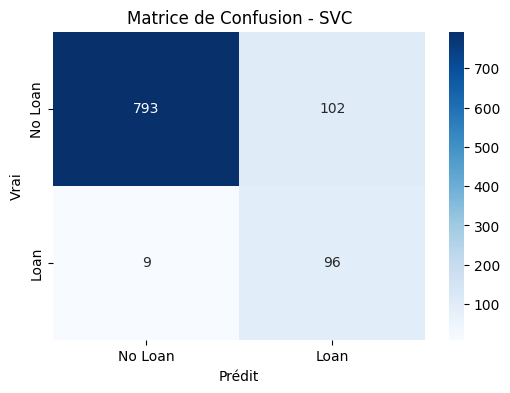

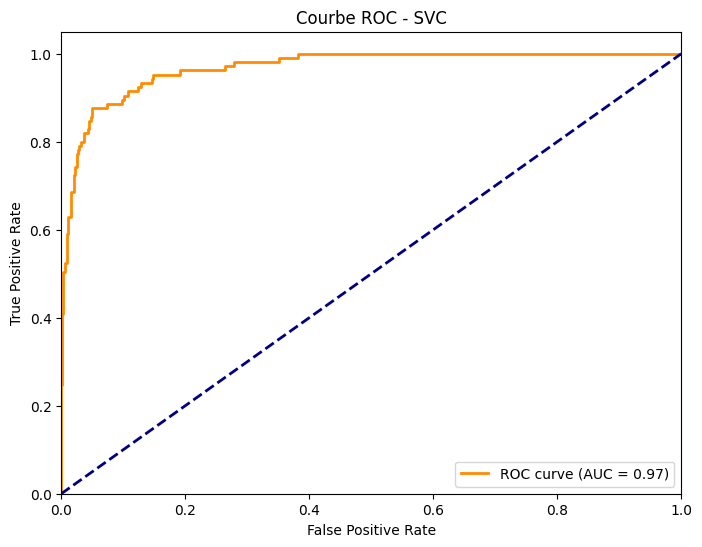

In [40]:
# Mod√®le SVC lin√©aire de base
svc_model = SVC(
    kernel='linear',
    random_state=42,
    probability=True  # Pour obtenir les probabilit√©s
)

svc_model.fit(X_train_resampled, y_train_resampled)

# Pr√©dictions
y_pred = svc_model.predict(X_test)
y_pred_proba = svc_model.predict_proba(X_test)[:, 1]  # Probabilit√©s classe 1

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Rapport d√©taill√©
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Loan', 'Loan'],
            yticklabels=['No Loan', 'Loan'])
plt.title('Matrice de Confusion - SVC')
plt.ylabel('Vrai')
plt.xlabel('Pr√©dit')
plt.show()

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - SVC')
plt.legend(loc="lower right")
plt.show()

In [41]:
# D√©finition des param√®tres √† tester
param_grid = {
    'C': [0.1, 1, 10, 100],           # Param√®tre de r√©gularisation
    'kernel': ['linear', 'rbf', 'poly'],  # Types de noyaux
    'gamma': ['scale', 'auto', 0.1, 1]    # Pour les noyaux rbf/poly
}

# Grid Search avec cross-validation
grid_search = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Utilise tous les processeurs
)

grid_search.fit(X_train_resampled, y_train_resampled)

# Meilleurs param√®tres
print("Meilleurs param√®tres:", grid_search.best_params_)
print("Meilleur score (CV):", grid_search.best_score_)

# Utilisation du meilleur mod√®le
best_svc = grid_search.best_estimator_

Meilleurs param√®tres: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Meilleur score (CV): 0.9874482758620691


In [43]:
# Pr√©dictions avec le meilleur mod√®le
y_pred_best = best_svc.predict(X_test)
y_pred_proba_best = best_svc.predict_proba(X_test)[:, 1]

print("Performance du mod√®le optimis√©:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Performance du mod√®le optimis√©:
Accuracy: 0.9540

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.67      0.75       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000

